*Датасет об успеваемости студентов с Kaggle; он синтетический и предназначен для задач регрессии по предсказанию итогового балла по признакам учебных привычек и посещаемости. В файле 200 наблюдений и 6 атрибутов, включая целевой признак exam_score.*

**Предметная область и источник:**

Образование, аналитика учебной успеваемости и факторов, влияющих на экзаменационный результат.​

Источник: Kaggle, набор с аналогичным названием и структурой признаков (hours_studied, sleep_hours, attendance_percent, previous_scores, exam_score).​

**Характер данных -**
 Данные имитационные

**Признаки преимущественно числовые, присутствует строковый идентификатор; в датасете представлены следующие атрибуты:**


* student_id — строковый идентификатор студента, техническое поле для уникализации записей.​

* hours_studied — количество часов подготовки за период наблюдения, числовой признак.​

* sleep_hours — средние часы сна студента за период, числовой признак.​

* attendance_percent — посещаемость в процентах, числовой признак.​

* previous_scores — предыдущие оценки/баллы (история успеваемости), числовой признак.​

* exam_score — итоговый балл экзамена, числовой целевой признак для анализа зависимостей и будущего моделирования.

**Задача анализа -**
 Типовая постановка: предсказать непрерывный итоговый балл exam_score по признакам учебных привычек и посещаемости (регрессия).

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('student_exam_scores.csv')
df.head()

,student_id,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
0,S001,8.0,8.8,72.1,45,30.2
1,S002,1.3,8.6,60.7,55,25.0
2,S003,4.0,8.2,73.7,86,35.8
3,S004,3.5,4.8,95.1,66,34.0
4,S005,9.1,6.4,89.8,71,40.3


In [24]:
# Функция поиска выбросов по правилу IQR (заполняет список outliers_values)
def findOutliers(arr, outliers_values):
    arr = np.asarray(arr, dtype=float)
    q1 = np.nanpercentile(arr, 25)
    q3 = np.nanpercentile(arr, 75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    mask = (arr < lower) | (arr > upper)
    outliers_values[:] = arr[mask].tolist()
    return {
        "q1": q1, "q3": q3, "iqr": iqr,
        "lower": lower, "upper": upper,
        "count": int(mask.sum())
    }

**Описание блока анализа**

Считаем среднее значение и считаем СКО для каждого числового атрибута с использованием NumPy: создаём массив np.array(...), затем применяем arr.mean() и np.std для оценки центра и разброса.​

Строим гистограмму распределения с matplotlib: используем plt.figure, plt.hist, plt.show для визуальной оценки формы распределения и потенциальных аномалий.​

Находим выбросы по правилу IQR: вычисляем квартили Q1/Q3, межквартильный размах IQR, нижнюю и верхнюю границы; реализовано в функции findOutliers на базе np.nanpercentile.​

Считаем пропущенные значения: используем df[col].isna().sum() для каждого атрибута, чтобы определить объём неполноты данных.


=== Параметр: hours_studied ===
Среднее значение: 6.3255
СКО: 3.2192390016896852


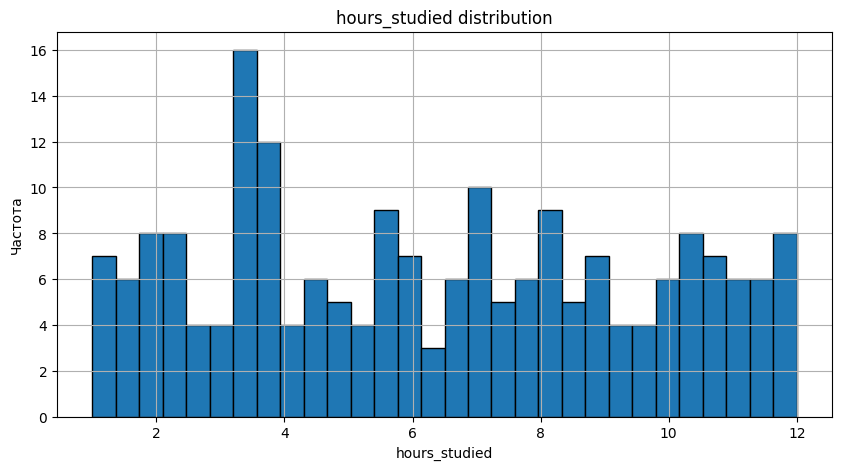

Пропущенные значения: 0
Выбросы: 
Количество: 0
Пропусков нет


In [31]:
col = 'hours_studied'
arr = np.array(df[col], dtype=float)

print(f"\n=== Параметр: {col} ===")
mean_val = arr.mean()
std_val  = np.std(arr)   # как в примере (ddof=0)
print('Среднее значение: ' + str(mean_val))
print('СКО: ' + str(std_val))

plt.figure(figsize=(10, 5))
plt.hist(arr, bins=30, edgecolor='black')
plt.grid(True)
plt.title(f'{col} distribution')
plt.xlabel(col)
plt.ylabel('Частота')
plt.show()

na_count = df[col].isna().sum()
print('Пропущенные значения: ' + str(na_count))

outliers_vals = []
stats = findOutliers(arr, outliers_vals)
print('Выбросы: ')
print(f"Количество: {stats['count']}")

if na_count > 0:
    median_val = np.nanmedian(arr)
    print(f"заполнить пропуски медианой = {median_val:.3f}")
else:
    print('Пропусков нет')


=== Параметр: sleep_hours ===
Среднее значение: 6.621999999999999
СКО: 1.4933907727048537


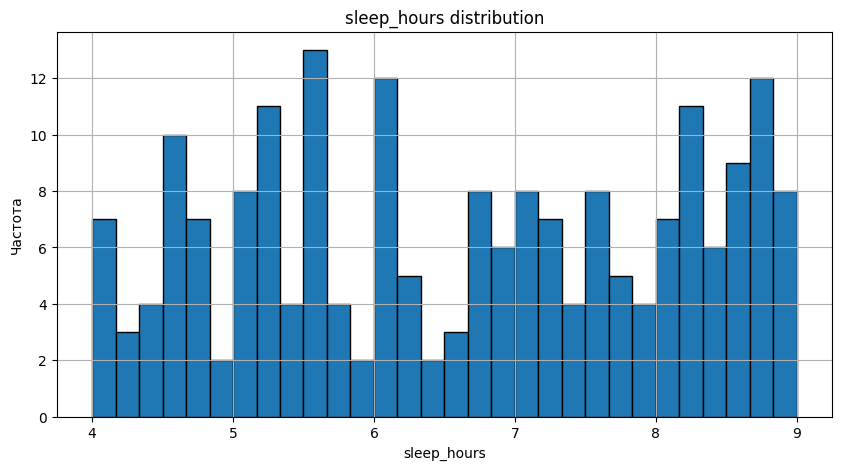

Пропущенные значения: 0
Выбросы: 
Количество: 0
Пропусков нет


In [32]:
# sleep_hours
col = 'sleep_hours'
arr = np.array(df[col], dtype=float)

print(f"\n=== Параметр: {col} ===")
mean_val = arr.mean()
std_val  = np.std(arr)   # как в примере (ddof=0)
print('Среднее значение: ' + str(mean_val))
print('СКО: ' + str(std_val))

plt.figure(figsize=(10, 5))
plt.hist(arr, bins=30, edgecolor='black')
plt.grid(True)
plt.title(f'{col} distribution')
plt.xlabel(col)
plt.ylabel('Частота')
plt.show()

na_count = df[col].isna().sum()
print('Пропущенные значения: ' + str(na_count))

outliers_vals = []
stats = findOutliers(arr, outliers_vals)
print('Выбросы: ')
print(f"Количество: {stats['count']}")

if na_count > 0:
    median_val = np.nanmedian(arr)
    print(f"заполнить пропуски медианой = {median_val:.3f}")
else:
    print('Пропусков нет')



=== Параметр: attendance_percent ===
Среднее значение: 74.83
СКО: 14.214235821879415


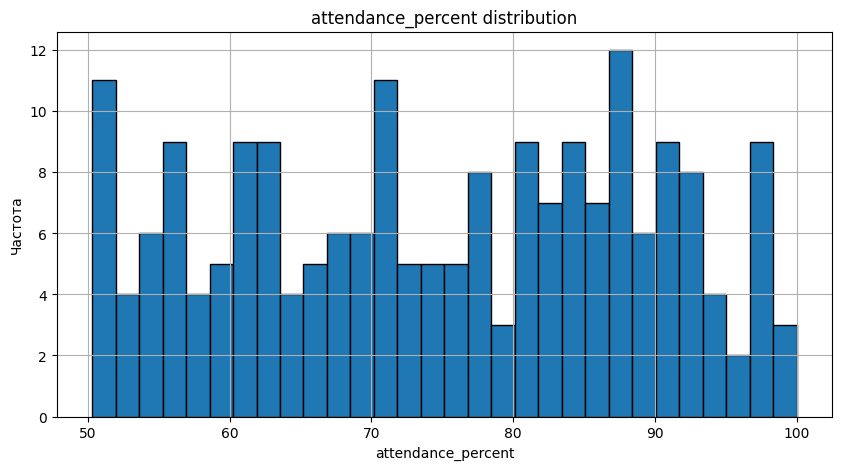

Пропущенные значения: 0
Выбросы: 
Количество: 0
Пропусков нет


In [33]:
# attendance_percent
col = 'attendance_percent'
arr = np.array(df[col], dtype=float)

print(f"\n=== Параметр: {col} ===")
mean_val = arr.mean()
std_val  = np.std(arr)
print('Среднее значение: ' + str(mean_val))
print('СКО: ' + str(std_val))

plt.figure(figsize=(10, 5))
plt.hist(arr, bins=30, edgecolor='black')
plt.grid(True)
plt.title(f'{col} distribution')
plt.xlabel(col)
plt.ylabel('Частота')
plt.show()

na_count = df[col].isna().sum()
print('Пропущенные значения: ' + str(na_count))

outliers_vals = []
stats = findOutliers(arr, outliers_vals)
print('Выбросы: ')
print(f"Количество: {stats['count']}")

if na_count > 0:
    median_val = np.nanmedian(arr)
    print(f"заполнить пропуски медианой = {median_val:.3f}")
else:
    print('Пропусков нет')



=== Параметр: previous_scores ===
Среднее значение: 66.8
СКО: 15.62465999630072


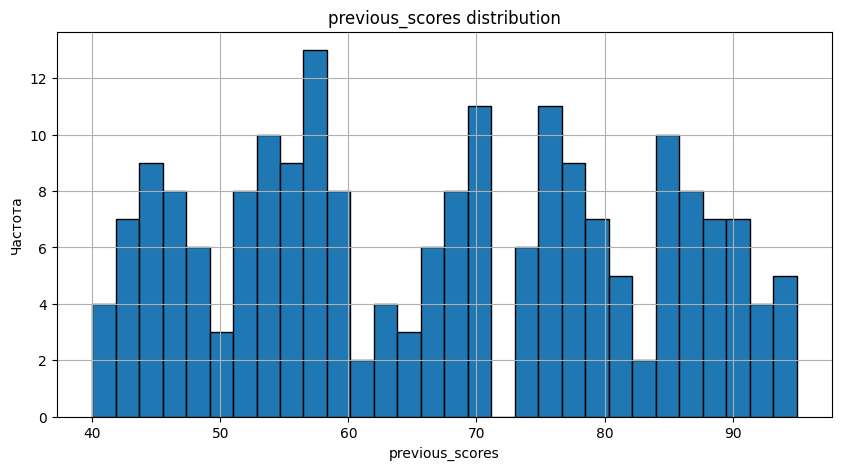

Пропущенные значения: 0
Выбросы: 
Количество: 0
Пропусков нет


In [34]:
# previous_scores
col = 'previous_scores'
arr = np.array(df[col], dtype=float)

print(f"\n=== Параметр: {col} ===")
mean_val = arr.mean()
std_val  = np.std(arr)
print('Среднее значение: ' + str(mean_val))
print('СКО: ' + str(std_val))

plt.figure(figsize=(10, 5))
plt.hist(arr, bins=30, edgecolor='black')
plt.grid(True)
plt.title(f'{col} distribution')
plt.xlabel(col)
plt.ylabel('Частота')
plt.show()

na_count = df[col].isna().sum()
print('Пропущенные значения: ' + str(na_count))

outliers_vals = []
stats = findOutliers(arr, outliers_vals)
print('Выбросы: ')
print(f"Количество: {stats['count']}")

if na_count > 0:
    median_val = np.nanmedian(arr)
    print(f"заполнить пропуски медианой = {median_val:.3f}")
else:
    print('Пропусков нет')



=== Параметр: exam_score ===
Среднее значение: 33.955
СКО: 6.772553063653322


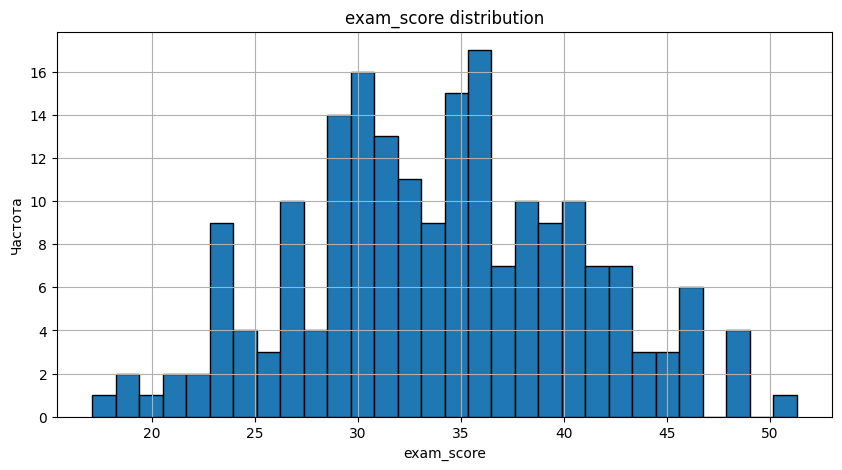

Пропущенные значения: 0
Выбросы: 
Количество: 0
Пропусков нет


In [35]:
# exam_score
col = 'exam_score'
arr = np.array(df[col], dtype=float)

print(f"\n=== Параметр: {col} ===")
mean_val = arr.mean()
std_val  = np.std(arr)
print('Среднее значение: ' + str(mean_val))
print('СКО: ' + str(std_val))

plt.figure(figsize=(10, 5))
plt.hist(arr, bins=30, edgecolor='black')
plt.grid(True)
plt.title(f'{col} distribution')
plt.xlabel(col)
plt.ylabel('Частота')
plt.show()

na_count = df[col].isna().sum()
print('Пропущенные значения: ' + str(na_count))

outliers_vals = []
stats = findOutliers(arr, outliers_vals)
print('Выбросы: ')
print(f"Количество: {stats['count']}")

if na_count > 0:
    median_val = np.nanmedian(arr)
    print(f"заполнить пропуски медианой = {median_val:.3f}")
else:
    print('Пропусков нет')


**Фиксация пропусков**

* Метод выявления: наличие пропусков проверялось вызовом df['<Название>'].isna().sum() по каждому атрибуту; по результатам проверки пропущенные значения не обнаружены ни в одном столбце.

* Вывод: на текущем этапе специальные процедуры обработки пропусков не требуются, так как их отсутствие исключает влияние на расчёт статистик и обучение моделей.

**Определение корреляции**

В ходе работы я рассмотрел 5 зависимостей между признаками:

* Часы учёбы (hours_studied) и результат экзамена (exam_score)
* Предыдущие оценки (previous_scores) и результат экзамена (exam_score)
* Посещаемость (attendance_percent) и результат экзамена (exam_score)
* Часы сна (sleep_hours) и часы учёбы (hours_studied)
* Посещаемость (attendance_percent) и предыдущие оценки (previous_scores)
Для определения характера и силы связи я рассчитал коэффициенты корреляции Пирсона с помощью функции np.corrcoef.

Какие атрибуты высококоррелированы и характер корреляции
1. Часы учёбы от результата экзамена:

Коэффициент = +0.78

Если студент тратит больше времени на подготовку, то, скорее всего, его экзаменационный балл будет выше. Сильная положительная корреляция.

2. Предыдущие оценки от результата экзамена:

Коэффициент = +0.43

Если у студента были высокие предыдущие оценки, то его текущий экзаменационный балл, вероятно, тоже будет выше. Умеренная положительная корреляция.

3. Посещаемость от результата экзамена:

Коэффициент = +0.23

При высокой посещаемости результат экзамена, как правило, немного выше. Слабая положительная корреляция.

4. Часы сна от часов учёбы:

Коэффициент = –0.12

Если студент много учится, он, возможно, спит немного меньше. Очень слабая отрицательная корреляция.

5. Посещаемость от предыдущих оценок:

Коэффициент = –0.19

Нет чёткой связи: студенты с высокими предыдущими оценками могут как регулярно посещать занятия, так и пропускать их. Слабая отрицательная корреляция.


*Какие атрибуты не имеют корреляции*

Из рассмотренных пар признаков все имеют некоторую корреляцию, но степень её выраженности различается.
Наименее коррелированы следующие пары:

Часы сна и часы учёбы (коэффициент ≈ –0.12)

Посещаемость и предыдущие оценки (коэффициент ≈ –0.19)

Эти связи настолько слабы, что их можно считать практически отсутствующими в контексте прогнозирования или анализа зависимости.

<Figure size 1200x1000 with 0 Axes>

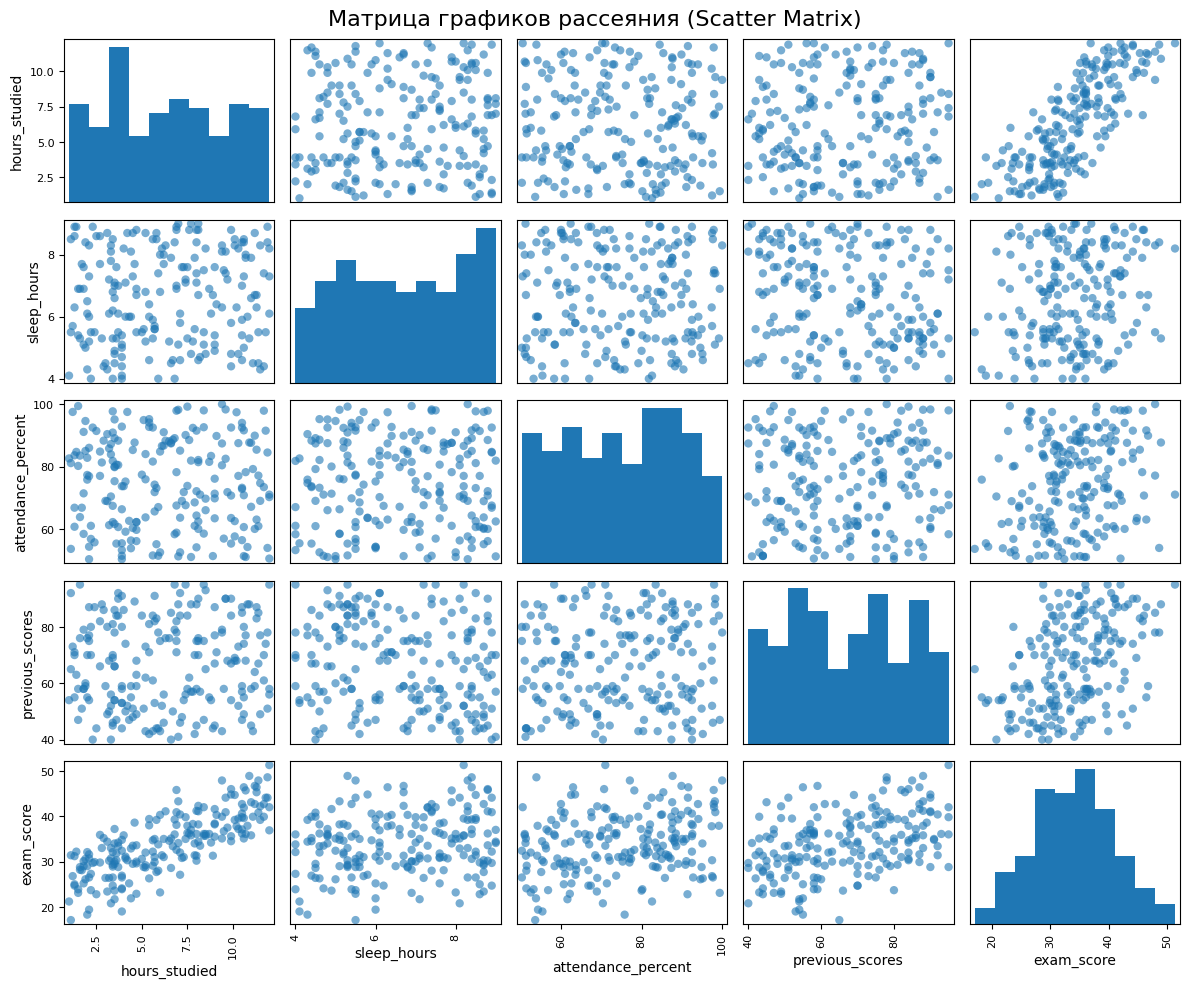

In [38]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# Select only numeric columns
numeric_cols = df.drop(columns=['student_id'])

# Create scatter matrix
plt.figure(figsize=(12, 10))
scatter_matrix(numeric_cols, alpha=0.6, figsize=(12, 10), diagonal='hist', marker='o')
plt.suptitle('Матрица графиков рассеяния (Scatter Matrix)', fontsize=16)
plt.tight_layout()
plt.show()

Импорт библиотек: matplotlib.pyplot для построения графиков и scatter_matrix из pandas.plotting для создания матрицы рассеяния.

Формирование подмножества числовых данных: из df исключается колонка идентификатора student_id, чтобы оставить только числовые признаки для анализа (df.drop(columns=['student_id'])).


Анализ матрицы графиков рассеяния:

* Наиболее выраженная положительная линейная зависимость наблюдается между количеством часов, потраченных на учёбу (hours_studied), и итоговым экзаменационным баллом (exam_score) — чем больше студент готовится, тем выше его результат.
* Предыдущие оценки (previous_scores) также умеренно коррелируют с экзаменационным баллом, что говорит о некоторой стабильности академической успеваемости.
* Посещаемость (attendance_percent) и часы сна (sleep_hours) практически не связаны с результатом экзамена — точки на соответствующих графиках рассеяния распределены хаотично, без чёткой тенденции.
* Между признаками sleep_hours и hours_studied нет заметной зависимости, что опровергает гипотезу о том, что интенсивная подготовка обязательно ведёт к снижению сна.